# Develop LSTM Models for Univariate Time Series Forecasting

In [2]:
#univariate LSTM example
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Flatten

In [10]:
#preparing independent and dependent features
def prepare_data(timeseries_data,n_features):
    x,y=[],[]
    for i in range(len(timeseries_data)):
        #find the end of this pattern
        end_ix=i + n_features
        #check if we are beyond the sequence
        if end_ix > len(timeseries_data)-1:
            break
        #gather input and output parts of the pattern
        seq_x, seq_y=timeseries_data[i:end_ix], timeseries_data[end_ix]
        x.append(seq_x)
        y.append(seq_y)
    return np.array(x), np.array(y)

In [16]:
#define the input sequence
timeseries_data=[110,125,133,146,158,172,187,196,210]
#choose a number of time steps
n_steps=3
#split into samples
x,y=prepare_data(timeseries_data,n_steps)

In [17]:
print(x),print(y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


(None, None)

In [18]:
x.shape

(6, 3)

In [19]:
# reshape from [samples, timesteps] into [samples,timesteps,features]
n_features =1
x=x.reshape((x.shape[0],x.shape[1],n_features))
x.shape

(6, 3, 1)

# Building LSTM Model

In [20]:
#Define model
model=Sequential()
model.add(LSTM(50,activation="relu",return_sequences=True,input_shape=(n_steps,n_features)))
model.add(LSTM(50,activation="relu"))
model.add(Dense(1))

model.compile(optimizer="adam",loss="mse")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 3, 50)             10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.fit(x,y,epochs=1000,verbose=1)

Train on 6 samples
Epoch 1/1000
6/6 [==============================] - 0s 3ms/sample - loss: 2.1709
Epoch 2/1000
6/6 [==============================] - 0s 4ms/sample - loss: 2.1720
Epoch 3/1000
6/6 [==============================] - 0s 3ms/sample - loss: 2.1691
Epoch 4/1000
6/6 [==============================] - 0s 3ms/sample - loss: 2.1702
Epoch 5/1000
6/6 [==============================] - 0s 3ms/sample - loss: 2.1677
Epoch 6/1000
6/6 [==============================] - 0s 4ms/sample - loss: 2.1684
Epoch 7/1000
6/6 [==============================] - 0s 3ms/sample - loss: 2.1667
Epoch 8/1000
6/6 [==============================] - 0s 3ms/sample - loss: 2.1708
Epoch 9/1000
6/6 [==============================] - 0s 3ms/sample - loss: 2.1735
Epoch 10/1000
6/6 [==============================] - 0s 3ms/sample - loss: 2.1712
Epoch 11/1000
6/6 [==============================] - 0s 3ms/sample - loss: 2.1646
Epoch 12/1000
6/6 [==============================] - 0s 4ms/sample - loss: 2.1646
Epoch 

Epoch 101/1000
6/6 [==============================] - 0s 3ms/sample - loss: 1.9957
Epoch 102/1000
6/6 [==============================] - 0s 3ms/sample - loss: 2.0119
Epoch 103/1000
6/6 [==============================] - 0s 2ms/sample - loss: 2.0143
Epoch 104/1000
6/6 [==============================] - 0s 2ms/sample - loss: 1.9866
Epoch 105/1000
6/6 [==============================] - 0s 2ms/sample - loss: 2.0046
Epoch 106/1000
6/6 [==============================] - 0s 3ms/sample - loss: 2.0045
Epoch 107/1000
6/6 [==============================] - 0s 3ms/sample - loss: 1.9785
Epoch 108/1000
6/6 [==============================] - 0s 3ms/sample - loss: 1.9941
Epoch 109/1000
6/6 [==============================] - 0s 3ms/sample - loss: 1.9733
Epoch 110/1000
6/6 [==============================] - 0s 3ms/sample - loss: 1.9888
Epoch 111/1000
6/6 [==============================] - 0s 2ms/sample - loss: 2.0003
Epoch 112/1000
6/6 [==============================] - 0s 2ms/sample - loss: 1.9835
Epoc

Epoch 200/1000
6/6 [==============================] - 0s 3ms/sample - loss: 1.9118
Epoch 201/1000
6/6 [==============================] - 0s 4ms/sample - loss: 1.9353
Epoch 202/1000
6/6 [==============================] - 0s 3ms/sample - loss: 1.8219
Epoch 203/1000
6/6 [==============================] - 0s 3ms/sample - loss: 1.8659
Epoch 204/1000
6/6 [==============================] - 0s 3ms/sample - loss: 1.8248
Epoch 205/1000
6/6 [==============================] - 0s 3ms/sample - loss: 1.8023
Epoch 206/1000
6/6 [==============================] - 0s 3ms/sample - loss: 1.7999
Epoch 207/1000
6/6 [==============================] - 0s 2ms/sample - loss: 1.7934
Epoch 208/1000
6/6 [==============================] - 0s 2ms/sample - loss: 1.8284
Epoch 209/1000
6/6 [==============================] - 0s 3ms/sample - loss: 1.7668
Epoch 210/1000
6/6 [==============================] - 0s 3ms/sample - loss: 1.7626
Epoch 211/1000
6/6 [==============================] - 0s 3ms/sample - loss: 1.7485
Epoc

Epoch 299/1000
6/6 [==============================] - 0s 3ms/sample - loss: 1.6002
Epoch 300/1000
6/6 [==============================] - 0s 3ms/sample - loss: 1.6833
Epoch 301/1000
6/6 [==============================] - 0s 2ms/sample - loss: 1.6876
Epoch 302/1000
6/6 [==============================] - 0s 2ms/sample - loss: 1.6437
Epoch 303/1000
6/6 [==============================] - 0s 2ms/sample - loss: 1.6952
Epoch 304/1000
6/6 [==============================] - 0s 3ms/sample - loss: 1.6285
Epoch 305/1000
6/6 [==============================] - 0s 2ms/sample - loss: 1.6653
Epoch 306/1000
6/6 [==============================] - 0s 2ms/sample - loss: 1.6322
Epoch 307/1000
6/6 [==============================] - 0s 2ms/sample - loss: 1.6509
Epoch 308/1000
6/6 [==============================] - 0s 2ms/sample - loss: 1.6268
Epoch 309/1000
6/6 [==============================] - 0s 2ms/sample - loss: 1.6340
Epoch 310/1000
6/6 [==============================] - 0s 2ms/sample - loss: 1.6185
Epoc

Epoch 398/1000
6/6 [==============================] - 0s 3ms/sample - loss: 1.4653
Epoch 399/1000
6/6 [==============================] - 0s 3ms/sample - loss: 1.4224
Epoch 400/1000
6/6 [==============================] - 0s 3ms/sample - loss: 1.4174
Epoch 401/1000
6/6 [==============================] - 0s 3ms/sample - loss: 1.4234
Epoch 402/1000
6/6 [==============================] - 0s 3ms/sample - loss: 1.4314
Epoch 403/1000
6/6 [==============================] - 0s 3ms/sample - loss: 1.4099
Epoch 404/1000
6/6 [==============================] - 0s 3ms/sample - loss: 1.3904
Epoch 405/1000
6/6 [==============================] - 0s 3ms/sample - loss: 1.3951
Epoch 406/1000
6/6 [==============================] - 0s 3ms/sample - loss: 1.4239
Epoch 407/1000
6/6 [==============================] - 0s 3ms/sample - loss: 1.4922
Epoch 408/1000
6/6 [==============================] - 0s 3ms/sample - loss: 1.3952
Epoch 409/1000
6/6 [==============================] - 0s 3ms/sample - loss: 1.5138
Epoc

Epoch 497/1000
6/6 [==============================] - 0s 3ms/sample - loss: 1.2874
Epoch 498/1000
6/6 [==============================] - 0s 3ms/sample - loss: 1.2706
Epoch 499/1000
6/6 [==============================] - 0s 3ms/sample - loss: 1.3043
Epoch 500/1000
6/6 [==============================] - 0s 3ms/sample - loss: 1.2176
Epoch 501/1000
6/6 [==============================] - 0s 4ms/sample - loss: 1.2579
Epoch 502/1000
6/6 [==============================] - 0s 3ms/sample - loss: 1.2752
Epoch 503/1000
6/6 [==============================] - 0s 3ms/sample - loss: 1.2542
Epoch 504/1000
6/6 [==============================] - 0s 3ms/sample - loss: 1.2313
Epoch 505/1000
6/6 [==============================] - 0s 3ms/sample - loss: 1.2662
Epoch 506/1000
6/6 [==============================] - 0s 3ms/sample - loss: 1.3173
Epoch 507/1000
6/6 [==============================] - 0s 3ms/sample - loss: 1.2490
Epoch 508/1000
6/6 [==============================] - 0s 3ms/sample - loss: 1.2702
Epoc

Epoch 596/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.9952
Epoch 597/1000
6/6 [==============================] - 0s 3ms/sample - loss: 1.1788
Epoch 598/1000
6/6 [==============================] - 0s 4ms/sample - loss: 1.1206
Epoch 599/1000
6/6 [==============================] - 0s 3ms/sample - loss: 1.0830
Epoch 600/1000
6/6 [==============================] - 0s 3ms/sample - loss: 1.0570
Epoch 601/1000
6/6 [==============================] - 0s 3ms/sample - loss: 1.0484
Epoch 602/1000
6/6 [==============================] - 0s 3ms/sample - loss: 1.1884
Epoch 603/1000
6/6 [==============================] - 0s 3ms/sample - loss: 1.0709
Epoch 604/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.9936
Epoch 605/1000
6/6 [==============================] - 0s 3ms/sample - loss: 1.0420
Epoch 606/1000
6/6 [==============================] - 0s 3ms/sample - loss: 1.0560
Epoch 607/1000
6/6 [==============================] - 0s 3ms/sample - loss: 1.0065
Epoc

Epoch 695/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.8635
Epoch 696/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.7901
Epoch 697/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.8698
Epoch 698/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.7540
Epoch 699/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.7801
Epoch 700/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.7802
Epoch 701/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.7437
Epoch 702/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.7873
Epoch 703/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.7600
Epoch 704/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.7811
Epoch 705/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.7390
Epoch 706/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.7401
Epoc

Epoch 794/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.6064
Epoch 795/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.6139
Epoch 796/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.5946
Epoch 797/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.6001
Epoch 798/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.5875
Epoch 799/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.6148
Epoch 800/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.6062
Epoch 801/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.5847
Epoch 802/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.5765
Epoch 803/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.5838
Epoch 804/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.5818
Epoch 805/1000
6/6 [==============================] - 0s 4ms/sample - loss: 0.5841
Epoc

Epoch 893/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.4944
Epoch 894/1000
6/6 [==============================] - 0s 4ms/sample - loss: 0.4936
Epoch 895/1000
6/6 [==============================] - 0s 4ms/sample - loss: 0.4926
Epoch 896/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.4919
Epoch 897/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.4908
Epoch 898/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.4909
Epoch 899/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.4899
Epoch 900/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.4882
Epoch 901/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.4873
Epoch 902/1000
6/6 [==============================] - 0s 4ms/sample - loss: 0.4863
Epoch 903/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.4856
Epoch 904/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.4859
Epoc

Epoch 992/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.4033
Epoch 993/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.4073
Epoch 994/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.4046
Epoch 995/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.3974
Epoch 996/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.3959
Epoch 997/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.3974
Epoch 998/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.3936
Epoch 999/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.3928
Epoch 1000/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.3919


# Predicting for the next 10 data

In [30]:
#demonstrate prediction for next 10 days
x_input=np.array([187,196,210])
temp_input=list(x_input)
lst_output=[]
i=0
while i<10:
    if len(temp_input)>3:
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input=x_input.reshape((1,n_steps,n_features))
        #print(x_input)
        yhat=model.predict(x_input,verbose=0)
        print("{} day input {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input=x_input.reshape(1,n_steps,n_features)
        yhat=model.predict(x_input,verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
        
print(lst_output)

[221.80269]
1 day input [196.        210.        221.8026886]
1 day input [[232.15704]]
2 day input [210.         221.8026886  232.15704346]
2 day input [[244.10892]]
3 day input [221.80269 232.15704 244.10892]
3 day input [[255.37099]]
4 day input [232.15704 244.10892 255.37099]
4 day input [[265.13736]]
5 day input [244.10892 255.37099 265.13736]
5 day input [[274.21545]]
6 day input [255.37099 265.13736 274.21545]
6 day input [[282.40988]]
7 day input [265.13736 274.21545 282.40988]
7 day input [[289.46362]]
8 day input [274.21545 282.40988 289.46362]
8 day input [[296.37415]]
9 day input [282.40988 289.46362 296.37415]
9 day input [[302.8375]]
[221.80269, 232.15704, 244.10892, 255.37099, 265.13736, 274.21545, 282.40988, 289.46362, 296.37415, 302.8375]


In [31]:
timeseries_data

[110, 125, 133, 146, 158, 172, 187, 196, 210]

In [32]:
len(timeseries_data)

9

In [33]:
lst_output

[221.80269,
 232.15704,
 244.10892,
 255.37099,
 265.13736,
 274.21545,
 282.40988,
 289.46362,
 296.37415,
 302.8375]

# Visualizaing the output

In [36]:
import matplotlib.pyplot as plt

In [39]:
day_new=np.arange(1,10)
day_pred=np.arange(10,20)

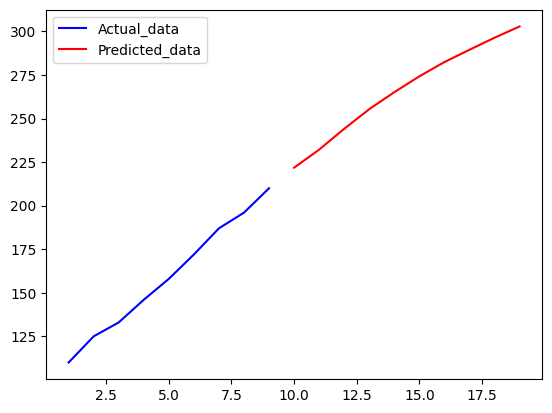

In [42]:
plt.plot(day_new,timeseries_data,color="b",label="Actual_data")
plt.plot(day_pred,lst_output,color="r",label="Predicted_data")
plt.legend()
plt.show()

In [43]:
model.save("LSTM-Univariate Time Series Forecasting.h5")